In [1]:
import os
os.chdir('..')

In [2]:
import numpy as np
import scipy as sp
import datajoint as dj

In [3]:
dj.config.load('dj_local_conf_template.json')

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import signal

from pipeline import lab, experiment, ephys, tracking, psth
from pipeline.plot import behavior_plot, unit_characteristic_plot

Connecting thinh@mesoscale-activity.datajoint.io:3306


# Retrieve a Session/Probe Insertion

In [7]:
insertion_key = (ephys.ProbeInsertion & {'session': 15, 'subject_id': 412330, 'insertion_number': 1}).fetch1('KEY')

In [8]:
insertion_key2 = (ephys.ProbeInsertion & {'session': 15, 'subject_id': 412330, 'insertion_number': 2}).fetch1('KEY')

In [9]:
print(insertion_key)

{'subject_id': 412330, 'session': 15, 'insertion_number': 1}


# Plot Clustering Quality

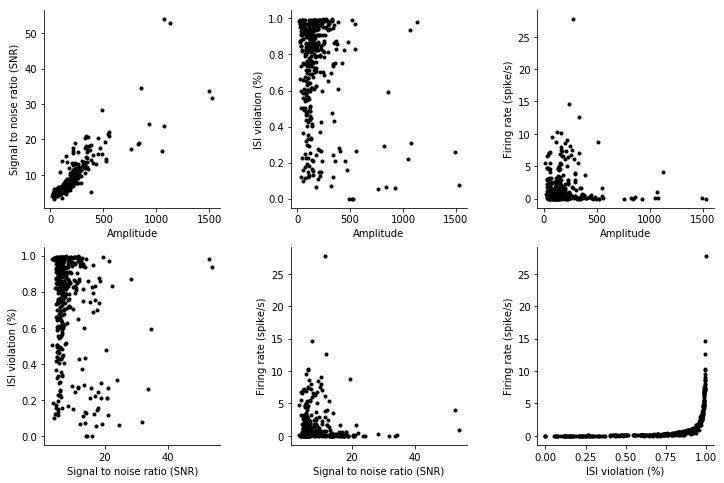

In [10]:
unit_characteristic_plot.plot_clustering_quality(insertion_key)

# Plot unit characteristic - overlay on probe

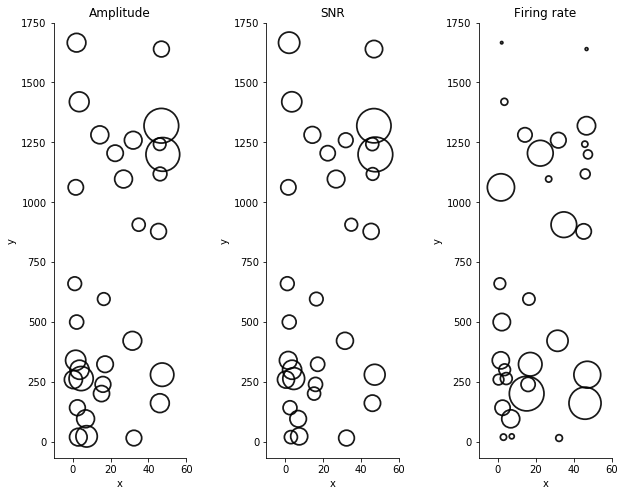

In [11]:
unit_characteristic_plot.plot_unit_characteristic(insertion_key)

# Plot unit selectivity - overlay on probe

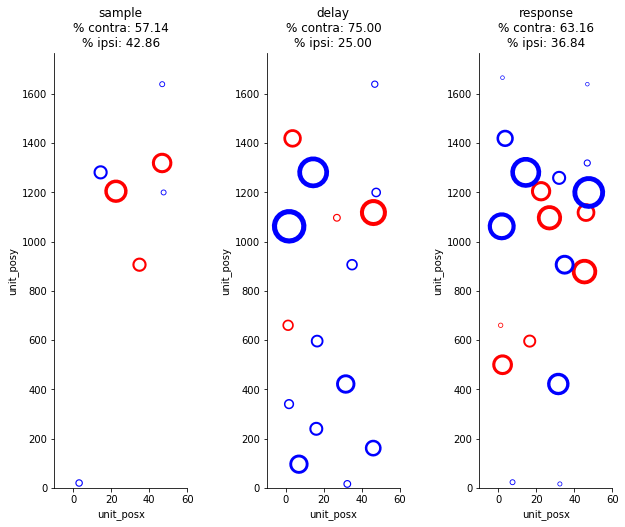

In [12]:
unit_characteristic_plot.plot_unit_selectivity(insertion_key)

# Plot effect of bilateral perturbation - overlay on probe

In [ ]:
unit_characteristic_plot.plot_unit_bilateral_photostim_effect(insertion_key)

# Plot unit PSTHs categorized by selectivity

In [ ]:
unit_characteristic_plot.plot_stacked_contra_ipsi_psth(insertion_key)

# Plot average PSTH categorized by selectivy

In [ ]:
unit_characteristic_plot.plot_avg_contra_ipsi_psth(insertion_key)

# Plot average PSTH - effect of bilateral perturbation

In [ ]:
unit_characteristic_plot.plot_psth_bilateral_photostim_effect(insertion_key)

# Plot trial psth projected on the coding direction vector

### CD vector is calculated for:
+ the specified **units**
+ the specified **time_period**

In [ ]:
units = psth.UnitSelectivity & insertion_key & ephys.TrialSpikes & 'unit_selectivity != "non-selective"'
unit_characteristic_plot.plot_coding_direction(units,  time_period=(-0.4, 0))

### Plot trial-to-trial CD-endpoint correlation between two unit groups

In [ ]:
units_1 = psth.UnitSelectivity & insertion_key & ephys.TrialSpikes & 'unit_selectivity != "non-selective"'
units_2 = psth.UnitSelectivity & insertion_key & ephys.TrialSpikes & 'unit_selectivity != "non-selective"'
unit_characteristic_plot.plot_paired_coding_direction(units_1, units_2, labels=('R_alm1', 'R_alm2'), time_period=(-0.4, 0))

# ==================================================

In [18]:
import importlib
importlib.reload(unit_characteristic_plot)

<module 'pipeline.plot.unit_characteristic_plot' from 'C:\\Users\\thinh\\Documents\\TN-Vathes\\MAP\\map-ephys\\pipeline\\plot\\unit_characteristic_plot.py'>